In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,AdaBoostRegressor)
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_score)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error)

In [2]:
data = pd.read_csv(r'D:\Projects\media prediction and its cost.csv')
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
data.shape

(60428, 40)

In [4]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [5]:
data.drop(columns= 'avg_cars_at home(approx).1',inplace=True)

In [6]:
data.shape

(60428, 39)

In [7]:
cat_cols = ['food_category','food_department', 'food_family','promotion_name', 'sales_country','marital_status', 'gender','total_children', 
            'education','member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)','brand_name',
           'recyclable_package', 'low_fat','store_type', 'store_city', 'store_state', 'coffee_bar', 'video_store', 'salad_bar',
            'prepared_food', 'florist', 'media_type','avg. yearly_income']
num_cols = ['store_sales(in millions)', 'store_cost(in millions)','unit_sales(in millions)','SRP', 'gross_weight',
            'net_weight','units_per_case','store_sqft', 'grocery_sqft','frozen_sqft', 'meat_sqft','cost']

In [8]:
for i in cat_cols:
    print(f' for {i}:\n{data[i].value_counts(normalize=True)}\n')

 for food_category:
food_category
Vegetables              0.123122
Snack Foods             0.114500
Dairy                   0.063464
Meat                    0.051417
Fruit                   0.050970
Jams and Jellies        0.042199
Baking Goods            0.032220
Breakfast Foods         0.032204
Bread                   0.029738
Canned Soup             0.028497
Beer and Wine           0.026312
Paper Products          0.025948
Bathroom Products       0.025683
Electrical              0.025551
Candy                   0.025452
Frozen Desserts         0.023929
Specialty               0.019428
Starchy Foods           0.018253
Magazines               0.016069
Kitchen Products        0.016036
Eggs                    0.015754
Hot Beverages           0.014745
Hygiene                 0.013752
Pain Relievers          0.013702
Pizza                   0.013586
Carbonated Beverages    0.012941
Pure Juice Beverages    0.012577
Cleaning Supplies       0.012378
Side Dishes             0.009946
Frozen En

In [9]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000
units_per_case,60428.0,18.860694,10.258555,1.0000,10.00,19.0000,28.000000,36.0000
store_sqft,60428.0,27988.477494,5701.022090,20319.0000,23593.00,27694.0000,30797.000000,39696.0000
grocery_sqft,60428.0,19133.799696,3987.395735,13305.0000,16232.00,18670.0000,22123.000000,30351.0000
frozen_sqft,60428.0,5312.852552,1575.907263,2452.0000,4746.00,5062.0000,5751.000000,9184.0000


In [10]:
data.isnull().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
avg_cars_at home(approx)    0
avg. yearly_income          0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

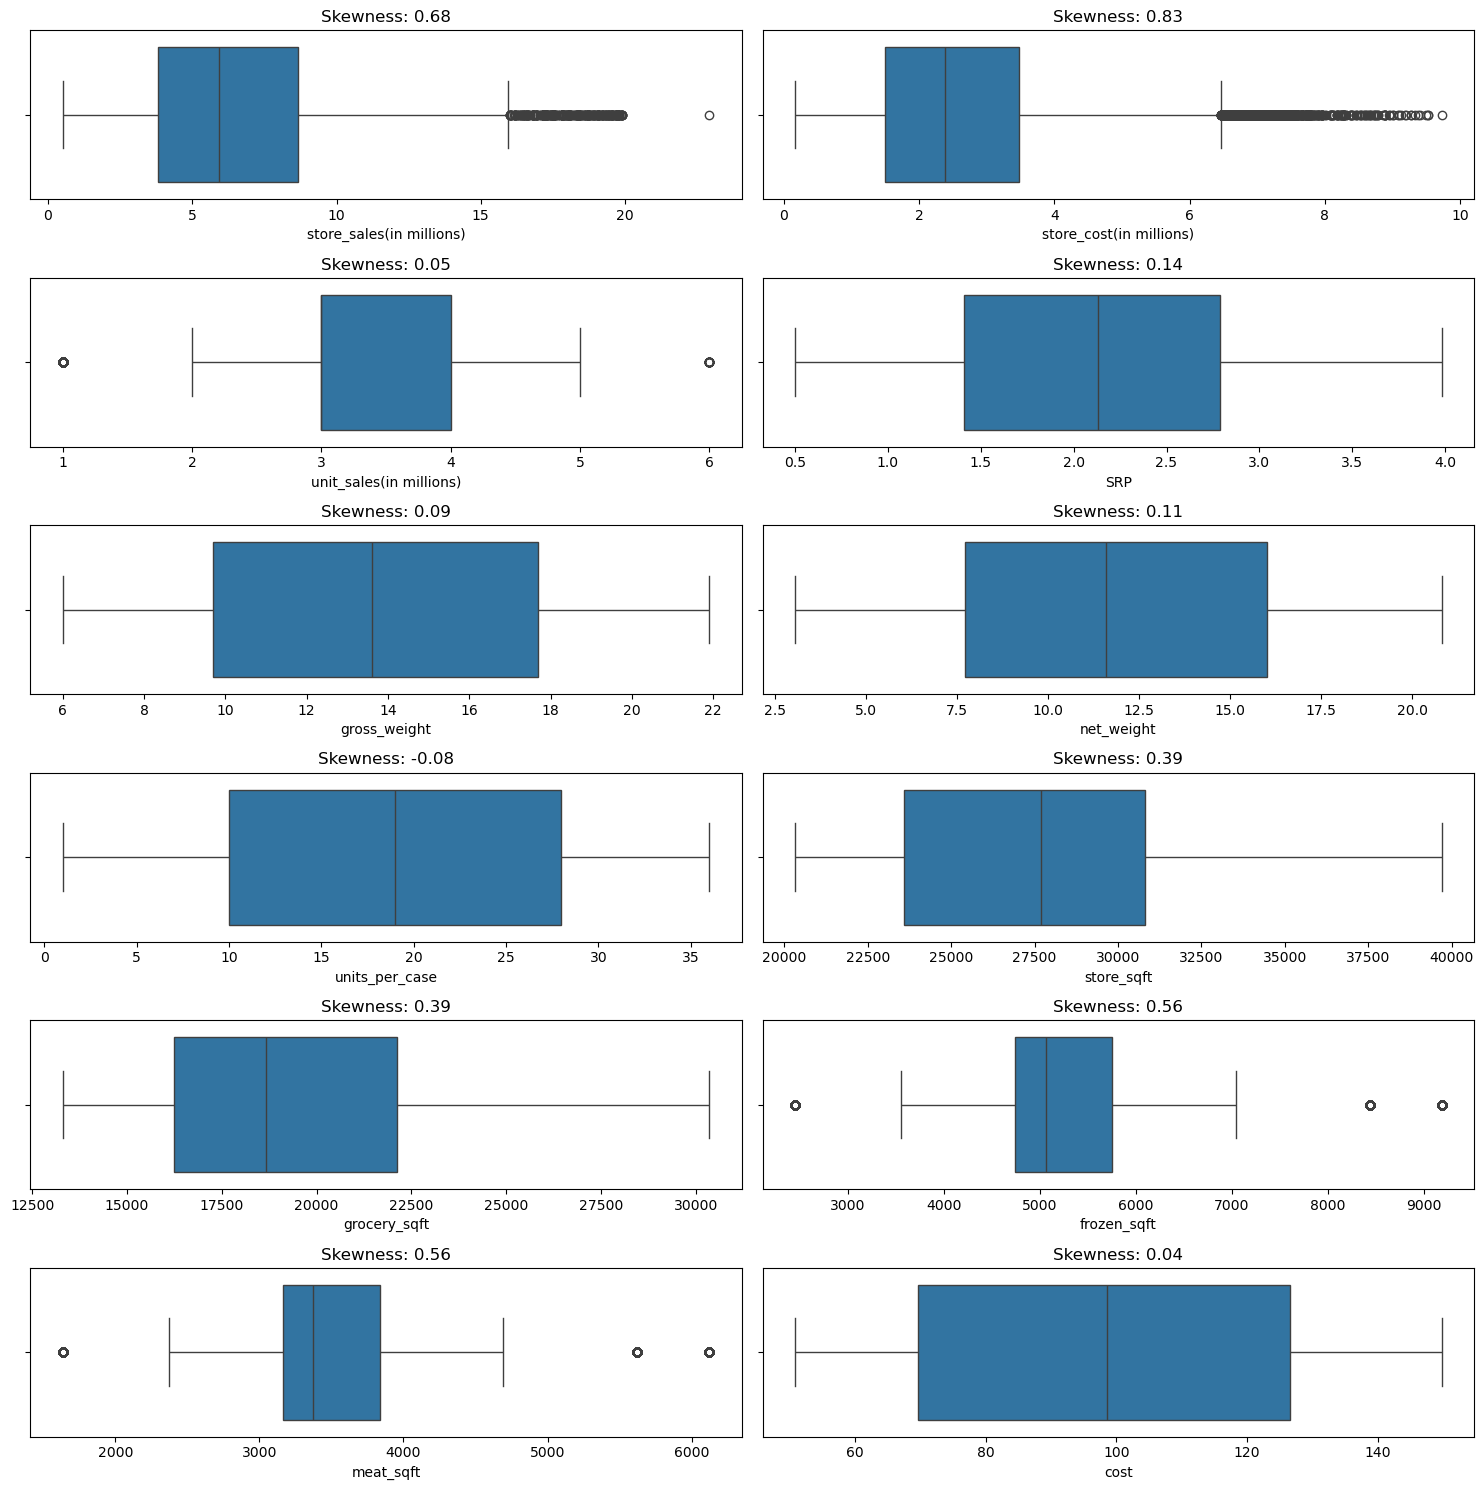

In [11]:
t=1
plt.figure(figsize=(15,15))
for i in num_cols:
    plt.subplot(6,2,t)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [12]:
data[num_cols].corr()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
store_sales(in millions),1.000000,0.954685,0.503482,0.833478,0.036179,0.032014,-0.010630,0.015543,0.010442,0.017886,0.017883,-0.004621
store_cost(in millions),0.954685,1.000000,0.480087,0.795880,0.034237,0.030257,-0.009792,0.017877,0.012884,0.019245,0.019242,-0.004162
unit_sales(in millions),0.503482,0.480087,1.000000,-0.002358,0.001255,0.001137,0.000084,0.031464,0.024857,0.030563,0.030557,-0.015015
SRP,0.833478,0.795880,-0.002358,1.000000,0.043332,0.038639,-0.011951,0.001663,-0.000505,0.004375,0.004374,0.002082
gross_weight,0.036179,0.034237,0.001255,0.043332,1.000000,0.988903,-0.011754,-0.005254,-0.004749,-0.004195,-0.004195,0.001281
net_weight,0.032014,0.030257,0.001137,0.038639,0.988903,1.000000,-0.014394,-0.004374,-0.003723,-0.003843,-0.003842,0.001343
units_per_case,-0.010630,-0.009792,0.000084,-0.011951,-0.011754,-0.014394,1.000000,0.001947,0.003687,-0.001372,-0.001371,-0.002776
store_sqft,0.015543,0.017877,0.031464,0.001663,-0.005254,-0.004374,0.001947,1.000000,0.912864,0.784734,0.784768,-0.039656
grocery_sqft,0.010442,0.012884,0.024857,-0.000505,-0.004749,-0.003723,0.003687,0.912864,1.000000,0.463301,0.463350,-0.025108
frozen_sqft,0.017886,0.019245,0.030563,0.004375,-0.004195,-0.003843,-0.001372,0.784734,0.463301,1.000000,1.000000,-0.047971


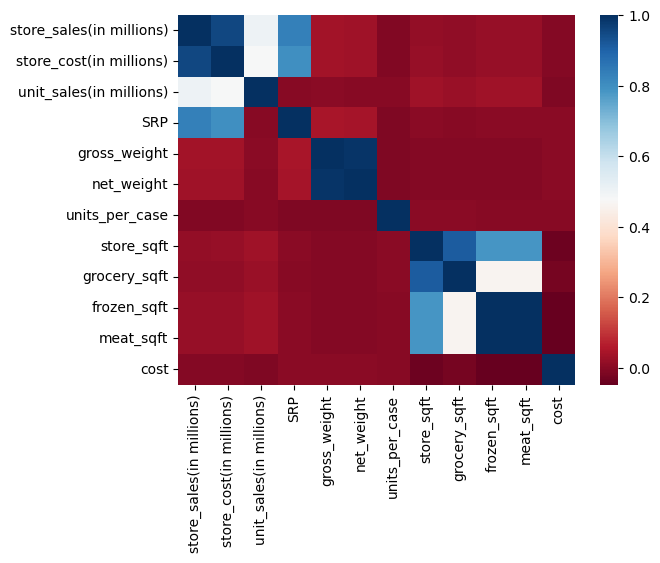

In [13]:
sns.heatmap(data[num_cols].corr(),cmap='RdBu')
plt.show()

In [14]:
# lets do chi-square contingency test to make final conclusions
# Ho: The columns are independent
# Ha: Columns are dependent

for i in cat_cols:
    contingency_table = pd.crosstab(data[i],data['cost'])
    print(i,':',stats.chi2_contingency(contingency_table)[1])

# we reject Ho in all the cases as pvalue is less than 0.05

food_category : 0.999210222454256
food_department : 0.9997112093201037
food_family : 0.9058102129754018
promotion_name : 0.0
sales_country : 0.0
marital_status : 4.420480284247487e-225
gender : 9.523958847226232e-258
total_children : 0.0
education : 0.0
member_card : 0.0
occupation : 0.0
houseowner : 3.082257770705632e-243
avg_cars_at home(approx) : 0.0
brand_name : 0.9999975960663122
recyclable_package : 0.6727639087752554
low_fat : 0.27367800042075635
store_type : 0.0
store_city : 0.0
store_state : 0.0
coffee_bar : 0.0
video_store : 0.0
salad_bar : 0.0
prepared_food : 0.0
florist : 0.0
media_type : 0.0
avg. yearly_income : 0.0


# Data Encoding

In [16]:
# defining a code to encode all the catwgorical columns in a single go

def encode_categorical_columns(df):
  encoders = {}

  # Encode each categorical column
  for col in cat_cols:
    unique_values = df[col].unique()
    mapping = {value: i for i, value in enumerate(unique_values)} 
    encoders[col] = mapping
    df[col] = df[col].map(mapping)

  return df, encoders

In [17]:
encode_categorical_columns(data)

(       food_category  food_department  food_family  store_sales(in millions)  \
 0                  0                0            0                      7.36   
 1                  0                0            0                      5.52   
 2                  0                0            0                      3.68   
 3                  0                0            0                      3.68   
 4                  0                0            0                      4.08   
 ...              ...              ...          ...                       ...   
 60423             17               21            1                      2.76   
 60424             17               21            1                      1.60   
 60425             17               21            1                      5.52   
 60426             17               21            1                      8.28   
 60427             17               21            1                      9.20   
 
        store_cost(in mill

In [19]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,0,0,0,7.36,2.7232,4.0,0,0,0,0,...,18670.0,5415.0,3610.0,0,0,0,0,0,0,126.62
1,0,0,0,5.52,2.5944,3.0,1,0,0,1,...,18670.0,5415.0,3610.0,0,0,0,0,0,0,59.86
2,0,0,0,3.68,1.3616,2.0,2,0,1,0,...,18670.0,5415.0,3610.0,0,0,0,0,0,0,84.16
3,0,0,0,3.68,1.1776,2.0,1,0,0,0,...,18670.0,5415.0,3610.0,0,0,0,0,0,1,95.78
4,0,0,0,4.08,1.4280,3.0,3,0,0,1,...,18670.0,5415.0,3610.0,0,0,0,0,0,2,50.79


In [20]:
for i in cat_cols:
    print(f' for {i}:\n{data[i].value_counts(normalize=True)}\n')

 for food_category:
food_category
4     0.123122
7     0.114500
8     0.063464
12    0.051417
22    0.050970
14    0.042199
3     0.032220
0     0.032204
1     0.029738
24    0.028497
20    0.026312
25    0.025948
33    0.025683
19    0.025551
6     0.025452
5     0.023929
17    0.019428
9     0.018253
34    0.016069
18    0.016036
27    0.015754
13    0.014745
40    0.013752
31    0.013702
36    0.013586
15    0.012941
23    0.012577
10    0.012378
32    0.009946
35    0.009846
39    0.009615
41    0.009565
28    0.009515
37    0.006603
11    0.006553
26    0.006537
16    0.006206
38    0.003525
30    0.003293
21    0.003227
44    0.003210
42    0.003128
2     0.003012
43    0.002962
29    0.002830
Name: proportion, dtype: float64

 for food_department:
food_department
4     0.141011
6     0.114500
9     0.102353
0     0.101377
3     0.074419
2     0.070133
7     0.063464
10    0.063001
12    0.049878
14    0.046121
1     0.029738
15    0.026312
5     0.025452
8     0.018253
18    0.0

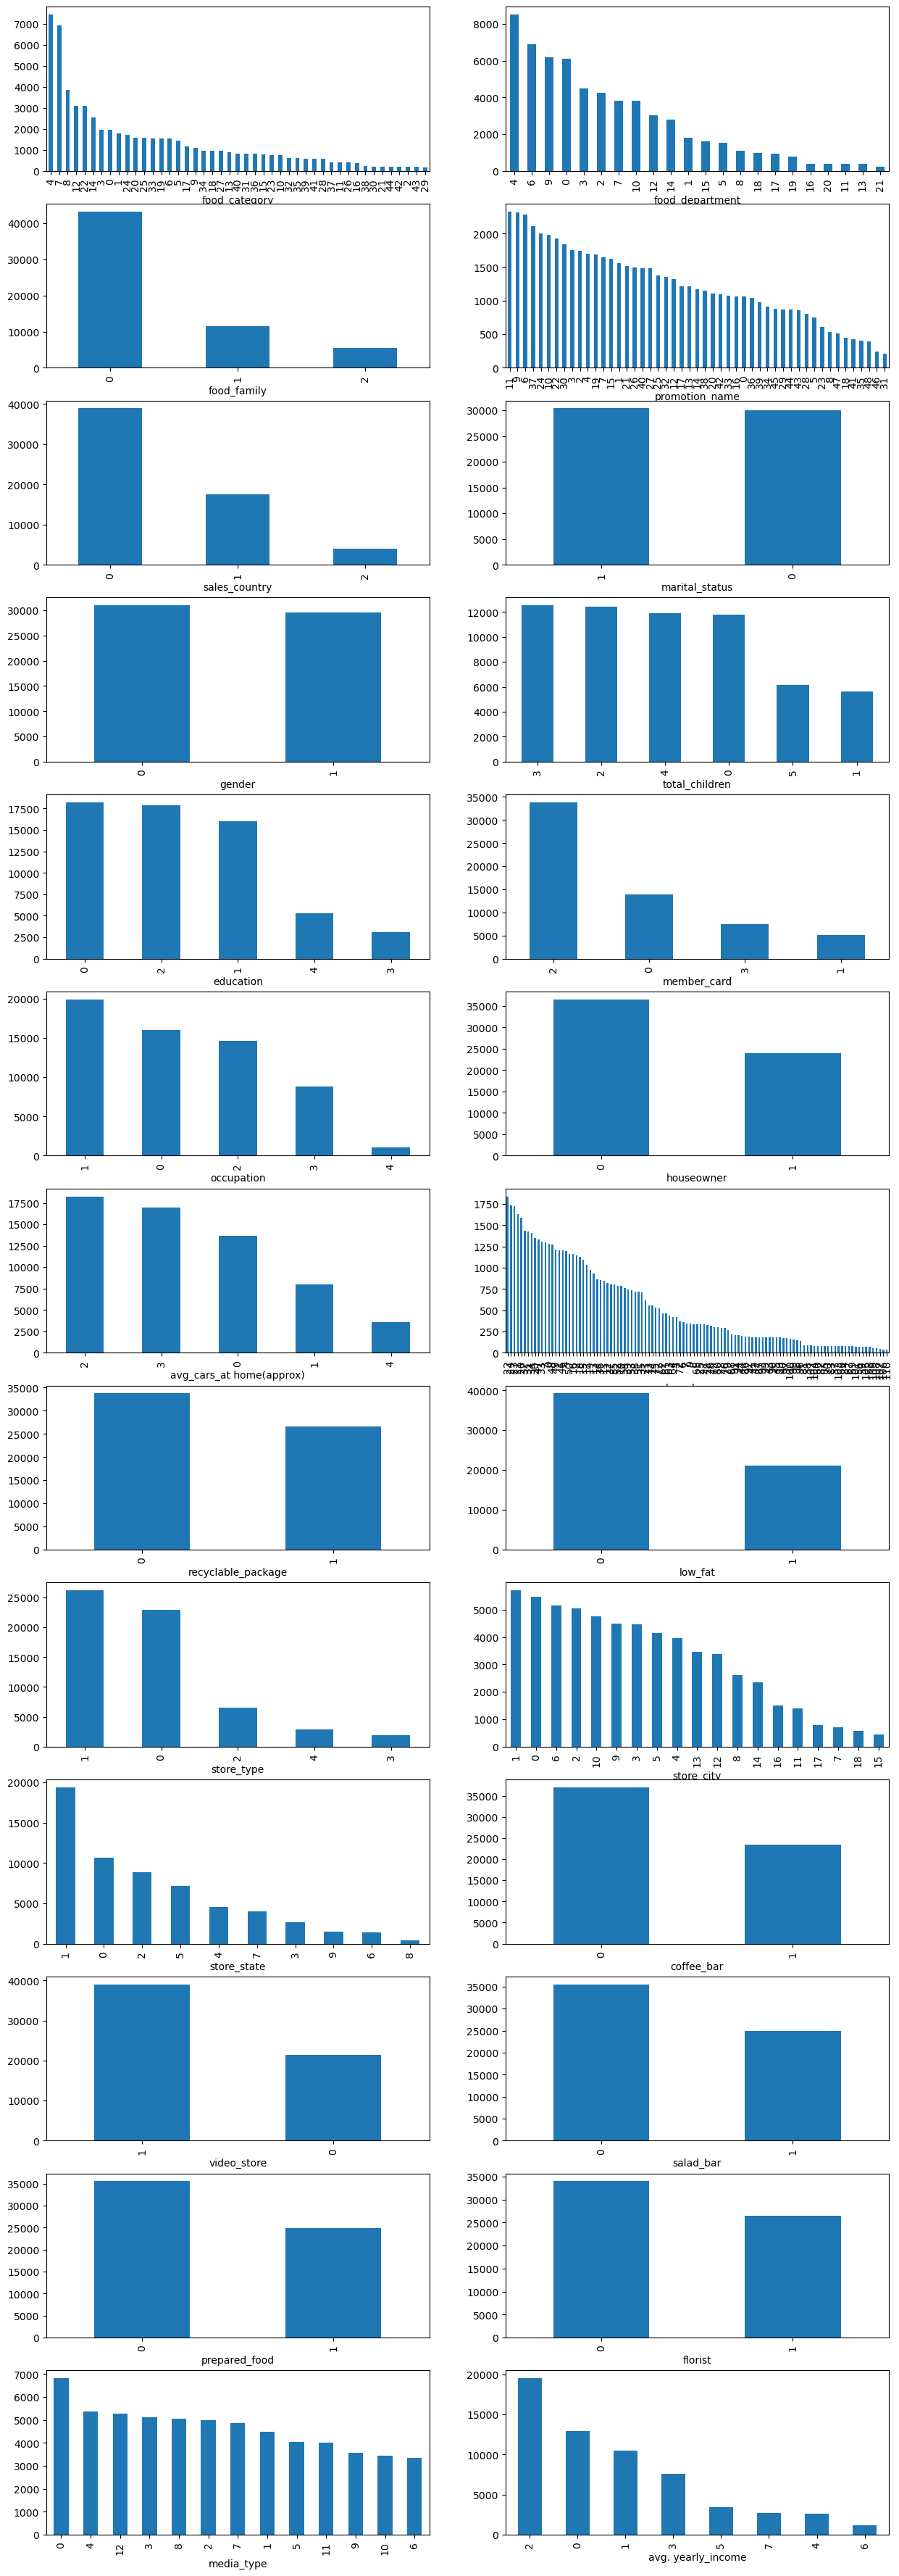

In [21]:
t = 1
plt.figure(figsize=(15,70))
for i in cat_cols:
    plt.subplot(20,2,t)
    data[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout
plt.show()

# Train/Test Split

In [23]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

In [24]:
y = data['cost']
x = data.drop(columns='cost')

In [25]:
y

0        126.62
1         59.86
2         84.16
3         95.78
4         50.79
          ...  
60423     95.25
60424     69.42
60425     67.51
60426    132.88
60427     87.76
Name: cost, Length: 60428, dtype: float64

In [26]:
x

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,0,0,0,7.36,2.7232,4.0,0,0,0,0,...,27694.0,18670.0,5415.0,3610.0,0,0,0,0,0,0
1,0,0,0,5.52,2.5944,3.0,1,0,0,1,...,27694.0,18670.0,5415.0,3610.0,0,0,0,0,0,0
2,0,0,0,3.68,1.3616,2.0,2,0,1,0,...,27694.0,18670.0,5415.0,3610.0,0,0,0,0,0,0
3,0,0,0,3.68,1.1776,2.0,1,0,0,0,...,27694.0,18670.0,5415.0,3610.0,0,0,0,0,0,1
4,0,0,0,4.08,1.4280,3.0,3,0,0,1,...,27694.0,18670.0,5415.0,3610.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,17,21,1,2.76,1.3248,1.0,33,0,0,0,...,22478.0,15321.0,4294.0,2863.0,0,1,1,1,1,1
60424,17,21,1,1.60,0.4960,1.0,42,0,1,0,...,22478.0,15321.0,4294.0,2863.0,0,1,1,1,1,7
60425,17,21,1,5.52,2.5392,2.0,11,0,0,1,...,22478.0,15321.0,4294.0,2863.0,0,1,1,1,1,6
60426,17,21,1,8.28,2.5668,3.0,20,2,1,1,...,34452.0,27463.0,4193.0,2795.0,0,1,1,1,0,7


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48342, 38)
(12086, 38)
(48342,)
(12086,)


# Model Fitting

In [30]:
m=[]
r2=[]
mse=[]
mape=[]
mae=[]
rmse=[]

def model_val(model,xtrain,ytrain,xtest,ytest):
    mod=model
    mod.fit(xtrain,ytrain)
    pred_h=mod.predict(xtest)

    print(r2_score(ytest,pred_h))

    response= input('Do you want to save this model? Y/N')
    if response.lower()=='y':
        global scorecard
        m.append(str(model))
        r2.append(r2_score(ytest,pred_h))
        mse.append(mean_squared_error(y_test,pred_h))
        mape.append(mean_absolute_percentage_error(ytest,pred_h))
        mae.append(mean_absolute_error(ytest,pred_h))
        rmse.append(mean_squared_error(y_test,pred_h)**0.5)

        scorecard = pd.DataFrame({'Model':m,'R-Sqr':r2,'mse':mse,'mape':mape,'mae':mae,'rmse':rmse})
    else:
        return
    

In [31]:
model_val(LinearRegression(),x_train,y_train,x_test,y_test)

0.03633754744197737


Do you want to save this model? Y/N y


In [32]:
scorecard

,Model,R-Sqr,mse,mape,mae,rmse
0,LinearRegression(),0.036338,871.915826,0.296875,25.548748,29.528221


In [33]:
model_val(RandomForestRegressor(),x_train,y_train,x_test,y_test)

0.998796994844795


Do you want to save this model? Y/N y


In [34]:
scorecard

,Model,R-Sqr,mse,mape,mae,rmse
0,LinearRegression(),0.036338,871.915826,0.296875,25.548748,29.528221
1,RandomForestRegressor(),0.998797,1.088472,0.000631,0.075914,1.043298


In [35]:
model_val(XGBRegressor(),x_train,y_train,x_test,y_test)

0.9980755475888183


Do you want to save this model? Y/N y


In [36]:
model_val(AdaBoostRegressor(),x_train,y_train,x_test,y_test)

0.14169084492768946


Do you want to save this model? Y/N y


In [37]:
scorecard

,Model,R-Sqr,mse,mape,mae,rmse
0,LinearRegression(),0.036338,871.915826,0.296875,25.548748,29.528221
1,RandomForestRegressor(),0.998797,1.088472,0.000631,0.075914,1.043298
2,"XGBRegressor(base_score=None, booster=None, ca...",0.998076,1.741233,0.003964,0.383980,1.319558
3,AdaBoostRegressor(),0.141691,776.592814,0.271792,23.349160,27.867415


Random Forest without GridSearchCv seems overfitted

In [38]:
score = cross_val_score(estimator=RandomForestRegressor(),X=x_train,y=y_train,cv=6)
score

array([0.9988116 , 0.99879755, 0.99887707, 0.9991    , 0.99868033,
       0.9989023 ])

In [39]:
grid = {'max_depth':[5,6,7,8,9,10]}

In [40]:
gscv = GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid,verbose=5,cv=6,scoring='r2')

In [41]:
gscv.fit(x,y)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV 1/6] END .......................max_depth=5;, score=0.310 total time=  14.0s
[CV 2/6] END .......................max_depth=5;, score=0.309 total time=  12.0s
[CV 3/6] END .......................max_depth=5;, score=0.312 total time=  12.1s
[CV 4/6] END .......................max_depth=5;, score=0.333 total time=  12.1s
[CV 5/6] END .......................max_depth=5;, score=0.344 total time=  12.1s
[CV 6/6] END .......................max_depth=5;, score=0.311 total time=  12.0s
[CV 1/6] END .......................max_depth=6;, score=0.417 total time=  14.5s
[CV 2/6] END .......................max_depth=6;, score=0.422 total time=  14.3s
[CV 3/6] END .......................max_depth=6;, score=0.420 total time=  14.4s
[CV 4/6] END .......................max_depth=6;, score=0.441 total time=  14.5s
[CV 5/6] END .......................max_depth=6;, score=0.462 total time=  14.5s
[CV 6/6] END .......................max_depth=6;,

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10]}, scoring='r2',
             verbose=5)

In [42]:
gscv.best_params_

{'max_depth': 10}

In [43]:
model_val(RandomForestRegressor(**gscv.best_params_),x_train,y_train,x_test,y_test)

0.8831552068536007


Do you want to save this model? Y/N y


In [44]:
scorecard

,Model,R-Sqr,mse,mape,mae,rmse
0,LinearRegression(),0.036338,871.915826,0.296875,25.548748,29.528221
1,RandomForestRegressor(),0.998797,1.088472,0.000631,0.075914,1.043298
2,"XGBRegressor(base_score=None, booster=None, ca...",0.998076,1.741233,0.003964,0.383980,1.319558
3,AdaBoostRegressor(),0.141691,776.592814,0.271792,23.349160,27.867415
4,RandomForestRegressor(max_depth=10),0.883155,105.720446,0.072681,6.462413,10.282045


In [85]:
scores = cross_val_score(estimator=RandomForestRegressor(**gscv.best_params_),X=x_train,y=y_train,cv=6)
scores

array([0.86830203, 0.90684079, 0.89577114, 0.88091778, 0.87005013,
       0.89203501])

In [104]:
# creating a final model

final_model = RandomForestRegressor(**gscv.best_params_,random_state=0)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [99]:
y_pred = final_model.predict(x_test)

In [101]:
print(f'R2: {round(r2_score(y_test,y_pred),3)}')
print(f'mse: {round(mean_squared_error(y_test,y_pred),3)}')
print(f'mape: {round(mean_absolute_percentage_error(y_test,y_pred),3)}')
print(f'mae: {round(mean_absolute_error(y_test,y_pred),3)}')
print(f'rmse: {round(mean_squared_error(y_test,y_pred)**0.5,3)}')

R2: 0.891
mse: 98.56
mape: 0.072
mae: 6.421
rmse: 9.928
